In [2]:
import os
import torch
import os
import matplotlib.pyplot as plt
import cv2
import scipy
import numpy as np
from PIL import Image

In [3]:
from IPython import display
display.clear_output()

In [ ]:
!pip install ultralytics

In [9]:
DATA_DIR = '/kaggle/input/posm-dataset-image/POSM_materials_dataset.v3i.yolov8/' #directory with data.yaml configuration file

In [10]:
with open(f'{DATA_DIR}data.yaml', 'r') as f:
    print(f.read())

train: ./train/images
val: ./valid/images
test: ./test/images

nc: 3
names: ['Megafon', 'Opponents', 'Yota']

roboflow:
  workspace: d2j3dspace1
  project: posm_materials_dataset
  version: 3
  license: CC BY 4.0
  url: https://universe.roboflow.com/d2j3dspace1/posm_materials_dataset/dataset/3



In [69]:
from ultralytics import YOLO
from ultralytics.utils.plotting import Annotator, colors

In [74]:
# Load a model
model = YOLO('yolov8x.pt', task='detect')
names = model.names


In [13]:
results = model.train(data=f'{DATA_DIR}/data.yaml', epochs=51, imgsz=640, verbose=False)

Ultralytics YOLOv8.2.16 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8x.pt, data=/kaggle/input/posm-dataset-image/POSM_materials_dataset.v3i.yolov8//data.yaml, epochs=51, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=False, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=

100%|██████████| 755k/755k [00:00<00:00, 15.1MB/s]
2024-05-16 08:45:08,865	INFO util.py:124 -- Outdated packages:
  ipywidgets==7.7.1 found, needs ipywidgets>=8
Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.
2024-05-16 08:45:09,983	INFO util.py:124 -- Outdated packages:
  ipywidgets==7.7.1 found, needs ipywidgets>=8
Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.


Overriding model.yaml nc=80 with nc=3

                   from  n    params  module                                       arguments                     
  0                  -1  1      2320  ultralytics.nn.modules.conv.Conv             [3, 80, 3, 2]                 
  1                  -1  1    115520  ultralytics.nn.modules.conv.Conv             [80, 160, 3, 2]               
  2                  -1  3    436800  ultralytics.nn.modules.block.C2f             [160, 160, 3, True]           
  3                  -1  1    461440  ultralytics.nn.modules.conv.Conv             [160, 320, 3, 2]              
  4                  -1  6   3281920  ultralytics.nn.modules.block.C2f             [320, 320, 6, True]           
  5                  -1  1   1844480  ultralytics.nn.modules.conv.Conv             [320, 640, 3, 2]              
  6                  -1  6  13117440  ultralytics.nn.modules.block.C2f             [640, 640, 6, True]           
  7                  -1  1   3687680  ultralytics

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:

  ········································


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


Freezing layer 'model.22.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks with YOLOv8n...


100%|██████████| 6.23M/6.23M [00:00<00:00, 74.3MB/s]


AMP: checks passed ✅


train: Scanning /kaggle/input/posm-dataset-image/POSM_materials_dataset.v3i.yolov8/train/labels... 1113 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1113/1113 [00:03<00:00, 340.79it/s]


train: WARNING ⚠️ Cache directory /kaggle/input/posm-dataset-image/POSM_materials_dataset.v3i.yolov8/train is not writeable, cache not saved.
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


val: Scanning /kaggle/input/posm-dataset-image/POSM_materials_dataset.v3i.yolov8/valid/labels... 106 images, 0 backgrounds, 0 corrupt: 100%|██████████| 106/106 [00:00<00:00, 338.72it/s]

val: WARNING ⚠️ Cache directory /kaggle/input/posm-dataset-image/POSM_materials_dataset.v3i.yolov8/valid is not writeable, cache not saved.


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001429, momentum=0.9) with parameter groups 97 weight(decay=0.0), 104 weight(decay=0.0005), 103 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 51 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/51      14.3G     0.9798      1.917      1.189         55        640: 100%|██████████| 70/70 [01:26<00:00,  1.23s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:05<00:00,  1.42s/it]

                   all        106        430     0.0113     0.0161    0.00227    0.00135



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/51      14.3G      1.104       1.47      1.294         63        640: 100%|██████████| 70/70 [01:27<00:00,  1.25s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.04it/s]

                   all        106        430     0.0616      0.162     0.0142     0.0093



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/51      14.3G      1.147      1.458      1.297         43        640: 100%|██████████| 70/70 [01:27<00:00,  1.25s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.13it/s]

                   all        106        430      0.198      0.242      0.165      0.105



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/51      13.9G      1.102      1.333      1.274         71        640: 100%|██████████| 70/70 [01:27<00:00,  1.25s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.09it/s]

                   all        106        430      0.369      0.475      0.311      0.225



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/51      14.2G      1.084      1.314      1.283         75        640: 100%|██████████| 70/70 [01:27<00:00,  1.25s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.10it/s]

                   all        106        430      0.498      0.601      0.549      0.405



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/51        14G      1.011      1.241       1.24         59        640: 100%|██████████| 70/70 [01:27<00:00,  1.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.13it/s]

                   all        106        430      0.641      0.617      0.616      0.447



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/51      14.2G      1.016      1.225      1.235         67        640: 100%|██████████| 70/70 [01:27<00:00,  1.25s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.13it/s]

                   all        106        430      0.694      0.635      0.657       0.49



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/51      13.9G     0.9922      1.157      1.224         54        640: 100%|██████████| 70/70 [01:27<00:00,  1.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.14it/s]

                   all        106        430      0.631      0.607      0.604      0.454



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/51      14.2G     0.9471      1.091      1.189         58        640: 100%|██████████| 70/70 [01:27<00:00,  1.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.13it/s]

                   all        106        430      0.664       0.69      0.675      0.508



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/51        14G     0.9229      1.073      1.184         88        640: 100%|██████████| 70/70 [01:27<00:00,  1.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.13it/s]

                   all        106        430      0.649      0.659      0.633      0.479



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/51      14.2G     0.9083      1.045      1.173         33        640: 100%|██████████| 70/70 [01:27<00:00,  1.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.14it/s]

                   all        106        430      0.689      0.656       0.68      0.523



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/51        14G      0.879     0.9876      1.159         27        640: 100%|██████████| 70/70 [01:26<00:00,  1.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.14it/s]

                   all        106        430      0.729      0.671      0.706      0.561



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/51      14.2G     0.8879      1.011      1.162         63        640: 100%|██████████| 70/70 [01:26<00:00,  1.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.13it/s]

                   all        106        430       0.66      0.687      0.689      0.531



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/51        14G     0.8837      0.996      1.166         45        640: 100%|██████████| 70/70 [01:26<00:00,  1.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.14it/s]

                   all        106        430      0.748      0.629       0.69      0.542



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/51      14.2G     0.8483     0.9519       1.14         53        640: 100%|██████████| 70/70 [01:27<00:00,  1.25s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.14it/s]

                   all        106        430      0.686      0.689       0.68      0.539



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/51      13.9G     0.8559      0.972      1.139         48        640: 100%|██████████| 70/70 [01:26<00:00,  1.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.14it/s]

                   all        106        430      0.696      0.741      0.721      0.573



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/51      14.2G       0.84     0.9184       1.13         72        640: 100%|██████████| 70/70 [01:27<00:00,  1.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.13it/s]

                   all        106        430      0.716      0.654      0.703      0.545



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/51      13.9G     0.8327     0.9005      1.126         85        640: 100%|██████████| 70/70 [01:26<00:00,  1.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.15it/s]

                   all        106        430      0.747      0.667      0.709      0.559



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/51      14.2G     0.8261     0.8883      1.123         70        640: 100%|██████████| 70/70 [01:26<00:00,  1.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.14it/s]

                   all        106        430      0.716      0.729      0.724      0.578



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/51      13.9G     0.8074     0.8691      1.106         60        640: 100%|██████████| 70/70 [01:26<00:00,  1.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.15it/s]

                   all        106        430      0.734      0.705      0.722      0.575



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/51      14.2G     0.7996      0.873      1.109         49        640: 100%|██████████| 70/70 [01:27<00:00,  1.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.13it/s]

                   all        106        430      0.741      0.711      0.739       0.59



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/51      13.9G     0.7945     0.8517      1.109         35        640: 100%|██████████| 70/70 [01:27<00:00,  1.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.15it/s]

                   all        106        430      0.767      0.694      0.734      0.592



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/51      14.2G     0.7893     0.8136      1.096         50        640: 100%|██████████| 70/70 [01:26<00:00,  1.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.13it/s]

                   all        106        430      0.726      0.762      0.745      0.584



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/51      13.9G      0.773     0.8081      1.094         62        640: 100%|██████████| 70/70 [01:27<00:00,  1.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.13it/s]

                   all        106        430      0.759      0.709      0.723      0.579



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/51      14.2G     0.7518     0.7817      1.076         61        640: 100%|██████████| 70/70 [01:26<00:00,  1.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.15it/s]

                   all        106        430      0.721      0.727      0.734      0.596



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/51      13.9G     0.7384     0.7279      1.073         54        640: 100%|██████████| 70/70 [01:27<00:00,  1.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.14it/s]

                   all        106        430       0.77      0.731      0.764      0.627



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/51      14.2G     0.7552     0.7533      1.074         52        640: 100%|██████████| 70/70 [01:27<00:00,  1.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.15it/s]

                   all        106        430      0.763      0.688      0.742      0.601



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/51      13.9G     0.7459     0.7487       1.07         67        640: 100%|██████████| 70/70 [01:26<00:00,  1.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.14it/s]

                   all        106        430      0.728      0.756      0.751      0.604



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/51      14.2G     0.7285      0.706      1.061         69        640: 100%|██████████| 70/70 [01:27<00:00,  1.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.14it/s]

                   all        106        430      0.739      0.728      0.756       0.61



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/51        14G     0.7242      0.716      1.075         75        640: 100%|██████████| 70/70 [01:27<00:00,  1.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.13it/s]

                   all        106        430      0.723      0.757      0.753      0.613



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/51      14.2G     0.7277     0.7147      1.067         56        640: 100%|██████████| 70/70 [01:27<00:00,  1.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.13it/s]

                   all        106        430      0.796      0.717      0.747      0.606



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/51      13.9G     0.7094     0.6885      1.058         51        640: 100%|██████████| 70/70 [01:27<00:00,  1.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.15it/s]

                   all        106        430      0.766      0.716      0.753      0.614



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/51      14.2G     0.7117     0.6788      1.058         57        640: 100%|██████████| 70/70 [01:27<00:00,  1.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.14it/s]

                   all        106        430      0.776      0.693      0.746       0.61



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/51      13.9G     0.7025     0.6799      1.056         59        640: 100%|██████████| 70/70 [01:26<00:00,  1.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.14it/s]

                   all        106        430      0.762      0.724      0.764      0.625



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/51      14.2G     0.7024     0.6599       1.06         46        640: 100%|██████████| 70/70 [01:27<00:00,  1.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.14it/s]

                   all        106        430      0.748      0.756      0.768      0.633



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/51      13.9G     0.6957     0.6411      1.045         47        640: 100%|██████████| 70/70 [01:27<00:00,  1.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.14it/s]

                   all        106        430      0.778      0.737       0.77      0.633



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/51      14.2G     0.6731     0.6337       1.04         66        640: 100%|██████████| 70/70 [01:27<00:00,  1.25s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.14it/s]

                   all        106        430      0.759      0.728      0.767      0.639



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/51      13.9G      0.666     0.5956      1.018         73        640: 100%|██████████| 70/70 [01:26<00:00,  1.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.14it/s]

                   all        106        430      0.759      0.743      0.767      0.635



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/51      14.2G      0.658     0.6107      1.032         41        640: 100%|██████████| 70/70 [01:27<00:00,  1.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.14it/s]

                   all        106        430      0.787      0.731      0.781      0.634



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/51      13.9G     0.6507     0.5742      1.019         56        640: 100%|██████████| 70/70 [01:27<00:00,  1.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.14it/s]

                   all        106        430      0.784       0.71      0.762      0.634



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/51      14.2G      0.648     0.5604      1.018         39        640: 100%|██████████| 70/70 [01:27<00:00,  1.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.15it/s]

                   all        106        430      0.796      0.741      0.772      0.638


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/51      13.9G      0.616      0.546      1.008         39        640: 100%|██████████| 70/70 [01:27<00:00,  1.25s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.15it/s]

                   all        106        430      0.763       0.75      0.779      0.649



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/51      14.2G     0.6035      0.492      1.008         39        640: 100%|██████████| 70/70 [01:26<00:00,  1.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.14it/s]

                   all        106        430      0.752      0.771      0.785      0.659



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/51      13.9G     0.5978     0.4927      1.004         39        640: 100%|██████████| 70/70 [01:26<00:00,  1.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.16it/s]

                   all        106        430       0.78      0.723      0.781       0.65



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/51      14.2G     0.5934     0.4654     0.9913         25        640: 100%|██████████| 70/70 [01:26<00:00,  1.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.14it/s]

                   all        106        430      0.823      0.705       0.78      0.657



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/51      13.9G     0.5779     0.4513     0.9917         40        640: 100%|██████████| 70/70 [01:26<00:00,  1.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.14it/s]

                   all        106        430      0.791      0.774      0.788      0.657



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/51      14.2G     0.5789     0.4434     0.9869         35        640: 100%|██████████| 70/70 [01:26<00:00,  1.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.15it/s]

                   all        106        430      0.792      0.763      0.793      0.658



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/51      13.9G      0.569     0.4341     0.9865         33        640: 100%|██████████| 70/70 [01:26<00:00,  1.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.14it/s]

                   all        106        430      0.834      0.731      0.793      0.666



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/51      14.2G     0.5587     0.4192     0.9817         37        640: 100%|██████████| 70/70 [01:26<00:00,  1.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.14it/s]

                   all        106        430      0.822      0.733      0.784      0.661



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/51      13.9G     0.5654     0.4205     0.9854         51        640: 100%|██████████| 70/70 [01:26<00:00,  1.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.16it/s]

                   all        106        430      0.819      0.718      0.788      0.658



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      51/51      14.2G     0.5506     0.3945     0.9748         30        640: 100%|██████████| 70/70 [01:26<00:00,  1.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.13it/s]

                   all        106        430      0.815      0.721       0.79      0.663



51 epochs completed in 1.320 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 136.7MB
Optimizer stripped from runs/detect/train/weights/best.pt, 136.7MB

Validating runs/detect/train/weights/best.pt...
Ultralytics YOLOv8.2.16 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 68126457 parameters, 0 gradients, 257.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:05<00:00,  1.45s/it]


                   all        106        430      0.835      0.731      0.794      0.666
Speed: 0.2ms preprocess, 27.6ms inference, 0.0ms loss, 22.0ms postprocess per image
Results saved to runs/detect/train


In [14]:
# Export the model
model.export(format='onnx')

Ultralytics YOLOv8.2.16 🚀 Python-3.10.13 torch-2.1.2 CPU (Intel Xeon 2.00GHz)
Model summary (fused): 268 layers, 68126457 parameters, 0 gradients, 257.4 GFLOPs

PyTorch: starting from 'runs/detect/train/weights/best.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 7, 8400) (130.4 MB)

ONNX: starting export with onnx 1.16.0 opset 17...
ONNX: export success ✅ 4.8s, saved as 'runs/detect/train/weights/best.onnx' (260.1 MB)

Export complete (10.3s)
Results saved to /kaggle/working/runs/detect/train/weights
Predict:         yolo predict task=detect model=runs/detect/train/weights/best.onnx imgsz=640  
Validate:        yolo val task=detect model=runs/detect/train/weights/best.onnx imgsz=640 data=/kaggle/input/posm-dataset-image/POSM_materials_dataset.v3i.yolov8//data.yaml  
Visualize:       https://netron.app


'runs/detect/train/weights/best.onnx'

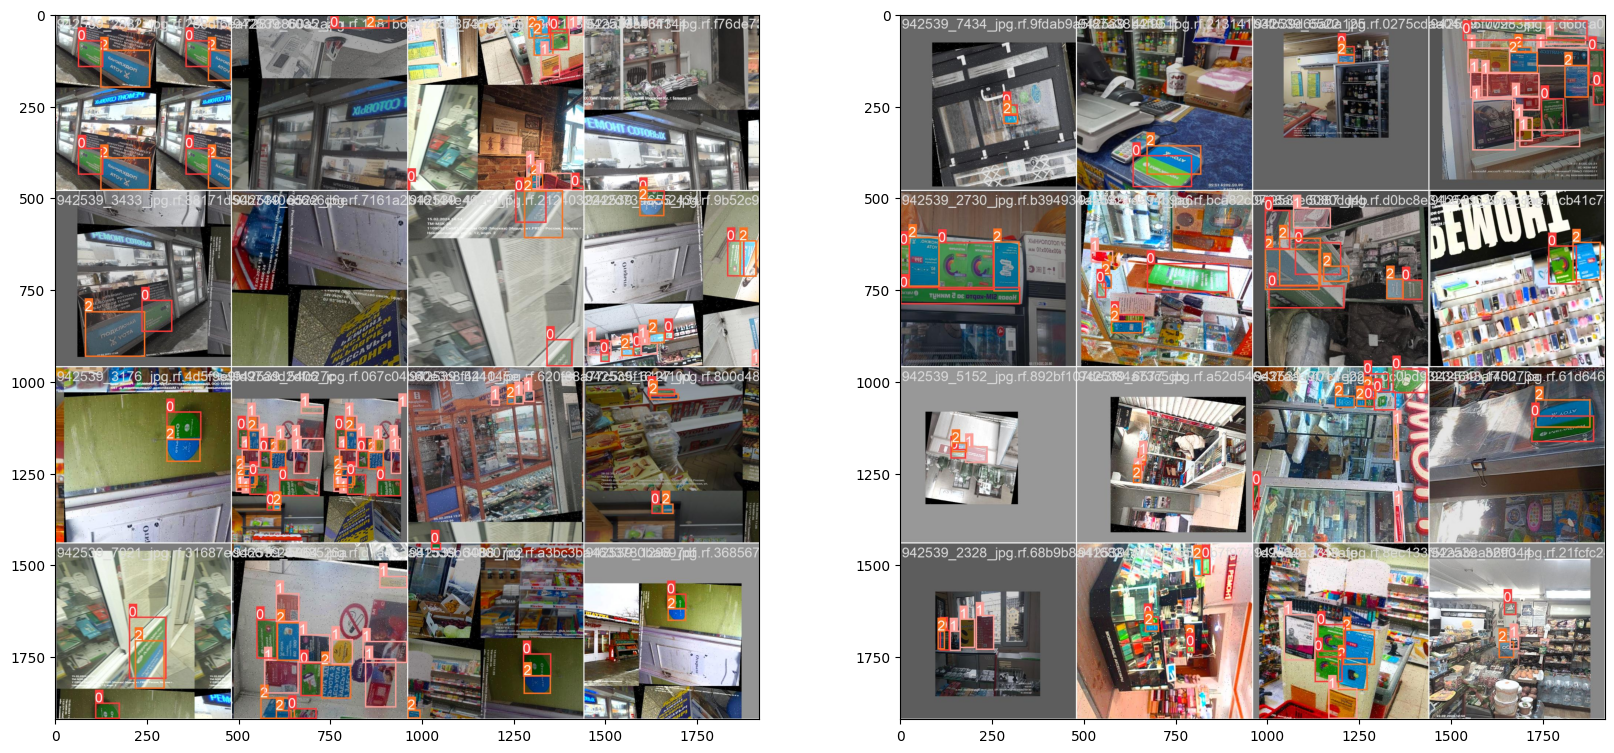

In [61]:
fig, ax = plt.subplots(1,2, figsize=(20,20))
ax[0].imshow(Image.open("/kaggle/working/runs/detect/train/train_batch0.jpg"))
ax[1].imshow(Image.open("/kaggle/working/runs/detect/train/train_batch2871.jpg"))
None

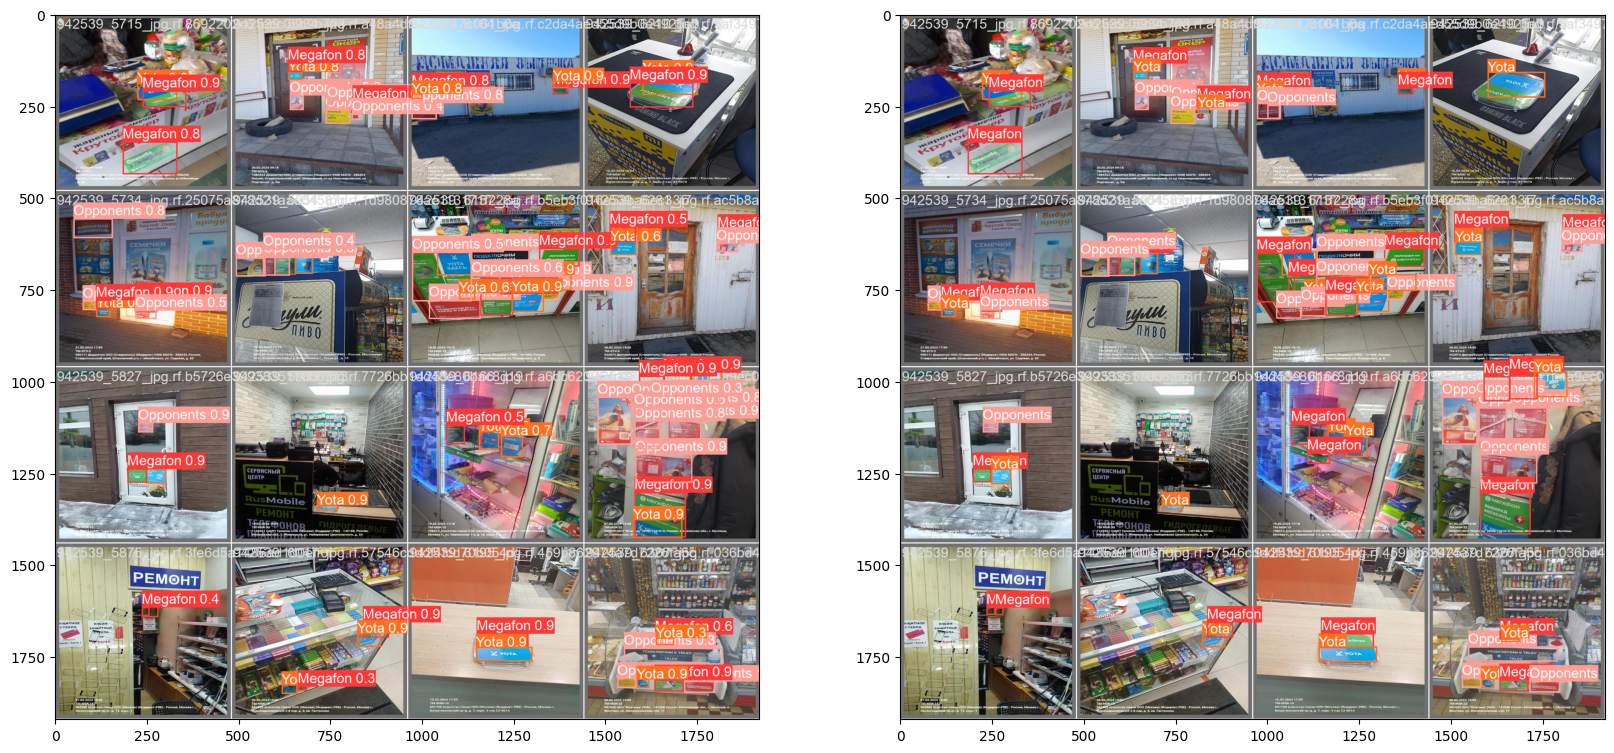

In [62]:
fig, ax = plt.subplots(1, 2, figsize=(20,20))
ax[0].imshow(Image.open("/kaggle/working/runs/detect/train/val_batch2_pred.jpg"))
ax[1].imshow(Image.open("/kaggle/working/runs/detect/train/val_batch2_labels.jpg"))
None

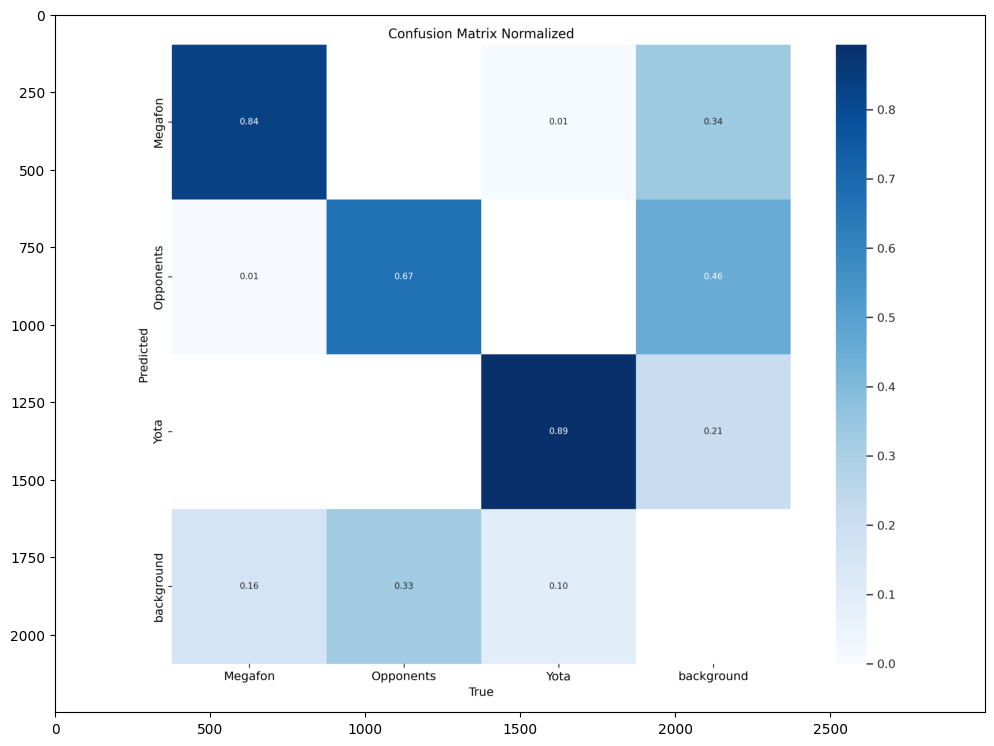

In [26]:
fig, ax = plt.subplots(figsize=(12,10))
plt.imshow(Image.open('/kaggle/working/runs/detect/train/confusion_matrix_normalized.png'))
None

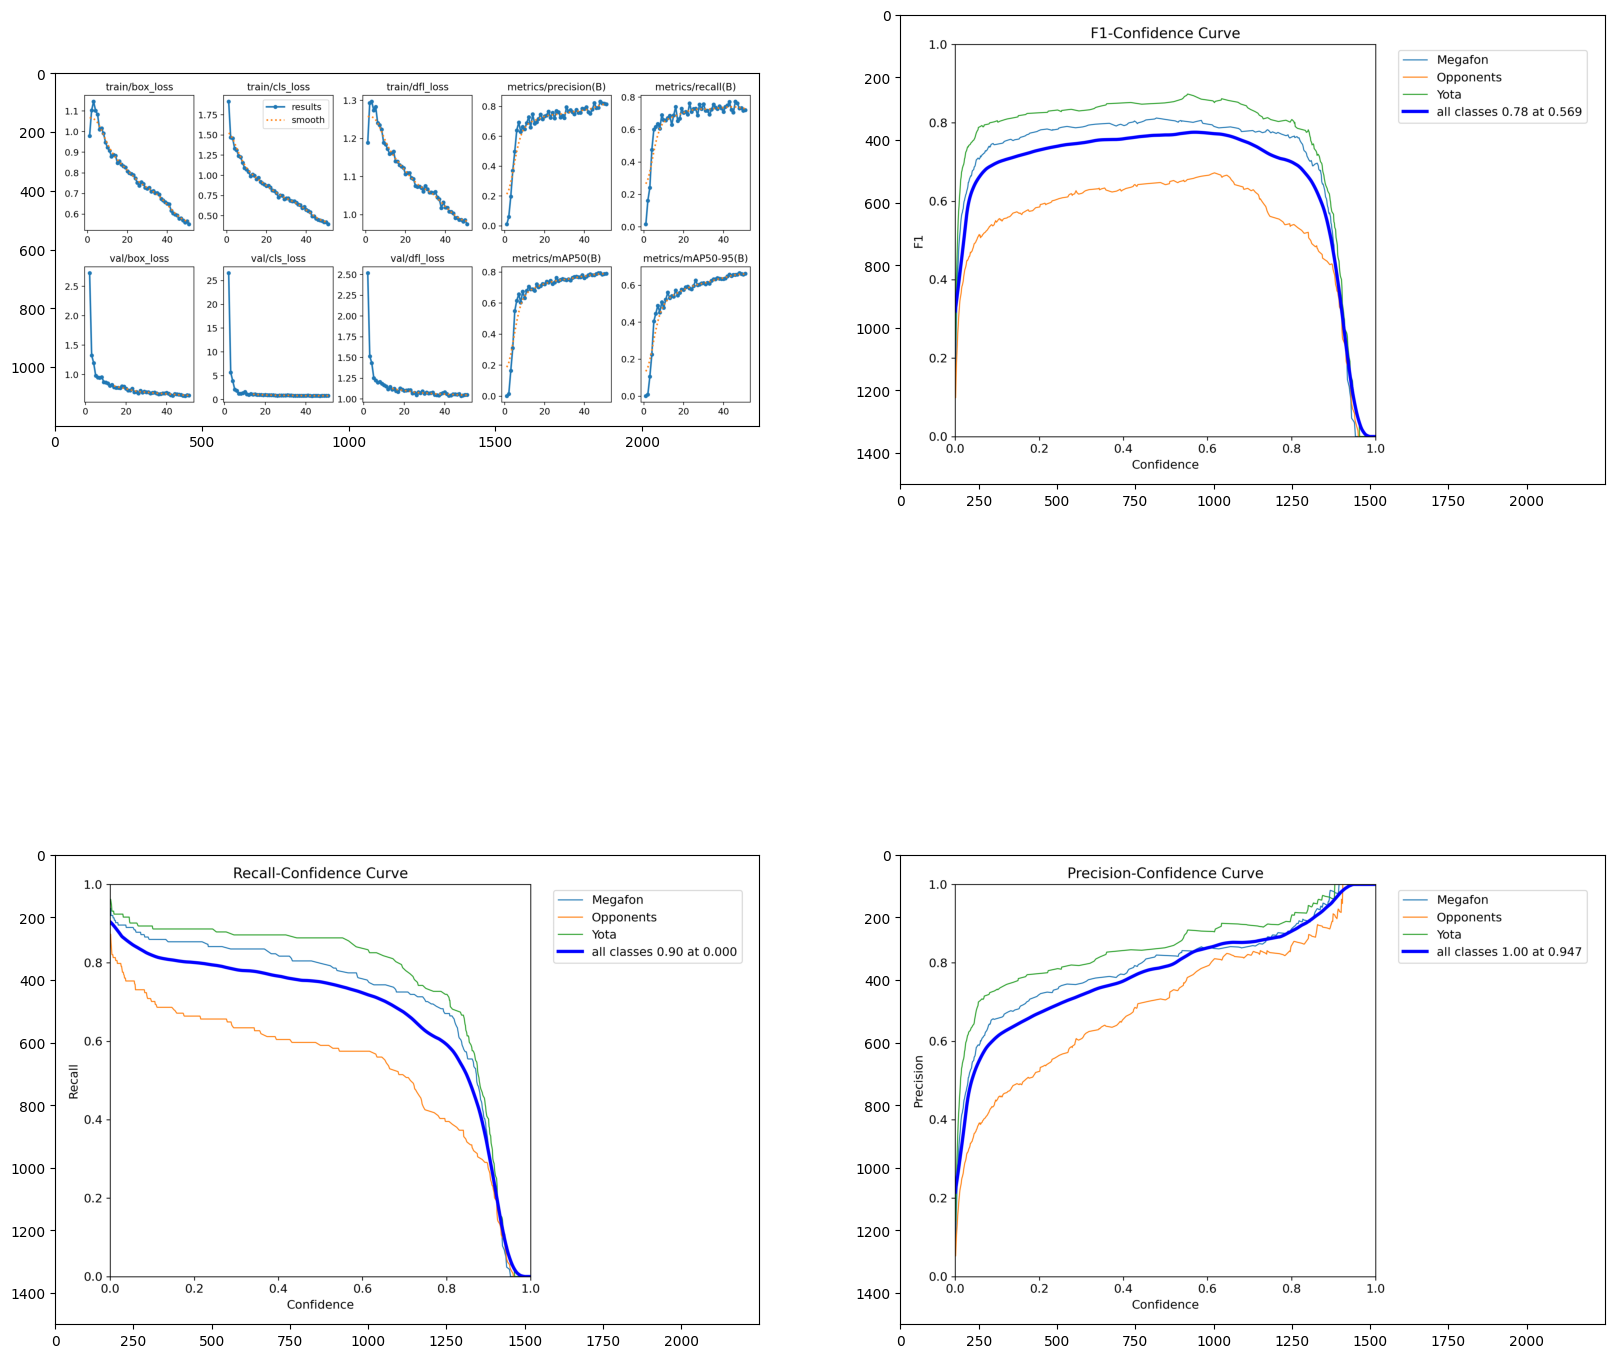

In [54]:
fig, ax = plt.subplots(2, 2, figsize=(20,20))
ax[0][0].imshow(Image.open("/kaggle/working/runs/detect/train/results.png"))
ax[0][1].imshow(Image.open("/kaggle/working/runs/detect/train/F1_curve.png"))
ax[1][0].imshow(Image.open("/kaggle/working/runs/detect/train/R_curve.png"))
ax[1][1].imshow(Image.open("/kaggle/working/runs/detect/train/P_curve.png"))
